In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
export_gm=pd.read_table('Trade_Map_-_List_of_products_exported_by_Germany.txt', sep='\t')
export_gm.rename(columns={'Code':'HS'}, inplace=True)
export_gm.drop(export_gm.index[0], inplace=True)
export_gm['HS']=export_gm['HS'].astype('int64')
hs_bec=pd.read_csv('hs_bec.csv')

In [3]:
export_gm=pd.merge(export_gm, hs_bec, how='left')

In [4]:
export_gm.columns

Index(['HS', 'Product label', 'Exported value in 2012',
       'Exported value in 2013', 'Exported value in 2014',
       'Exported value in 2015', 'Exported value in 2016',
       'Exported value in 2017', 'Exported value in 2018',
       'Exported value in 2019', 'Exported value in 2020',
       'Exported value in 2021', 'Unnamed: 12', 'BEC'],
      dtype='object')

In [5]:
export_gm=export_gm[['HS','BEC', 'Product label', 'Exported value in 2012',
       'Exported value in 2013', 'Exported value in 2014',
       'Exported value in 2015', 'Exported value in 2016',
       'Exported value in 2017', 'Exported value in 2018',
       'Exported value in 2019', 'Exported value in 2020',
       'Exported value in 2021', 'Unnamed: 12']]

In [6]:
export_gm.isnull().sum()

HS                           0
BEC                        884
Product label                0
Exported value in 2012       0
Exported value in 2013       0
Exported value in 2014       0
Exported value in 2015       0
Exported value in 2016       0
Exported value in 2017       0
Exported value in 2018       0
Exported value in 2019       0
Exported value in 2020       0
Exported value in 2021       0
Unnamed: 12               6196
dtype: int64

In [7]:
export_gm

,HS,BEC,Product label,Exported value in 2012,Exported value in 2013,Exported value in 2014,Exported value in 2015,Exported value in 2016,Exported value in 2017,Exported value in 2018,Exported value in 2019,Exported value in 2020,Exported value in 2021,Unnamed: 12
0,999999,NaN,Commodities not elsewhere specified,59373193,63816786,70174563,64670995,63831190,58021514,60664181,57559330,46910555,63274483,NaN
1,300490,711220.0,Medicaments consisting of mixed or unmixed pro...,36938587,38134155,39612106,35970611,37220220,42393474,45087259,45729836,49138138,52783884,NaN
2,870323,513202.0,Motor cars and other motor vehicles principall...,49549329,49490603,55114290,50015861,57000805,61580286,63825427,59214131,41983618,39686075,NaN
3,300215,711220.0,"Immunological products, put up in measured dos...",0,0,0,0,0,17544825,21685506,20062331,22519737,26220126,NaN
4,870340,513202.0,Motor cars and other motor vehicles principall...,0,0,0,0,0,115924,1589419,3733425,8230172,20431992,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6191,851730,NaN,Telephonic or telegraphic switching apparatus,0,0,0,0,0,0,0,0,0,0,NaN
6192,851790,NaN,Parts of electrical apparatus for line telepho...,0,0,0,0,0,0,0,0,0,0,NaN
6193,845699,NaN,Machine-tools for working any material by remo...,0,0,0,0,0,0,0,0,0,0,NaN
6194,845290,412010.0,"Furniture, bases and covers for sewing machine...",57088,58926,66801,54755,55431,62849,0,0,0,0,NaN


In [8]:
no_amount_gm=export_gm[(export_gm['Exported value in 2017']==0) 
                       & (export_gm['Exported value in 2018']==0) 
                       & (export_gm['Exported value in 2019']==0) 
                       & (export_gm['Exported value in 2020']==0) 
                       & (export_gm['Exported value in 2021']==0)].index


In [9]:
export_gm.drop(no_amount_gm, inplace=True)

In [10]:
export_gm[export_gm['BEC'].isnull()]

,HS,BEC,Product label,Exported value in 2012,Exported value in 2013,Exported value in 2014,Exported value in 2015,Exported value in 2016,Exported value in 2017,Exported value in 2018,Exported value in 2019,Exported value in 2020,Exported value in 2021,Unnamed: 12
0,999999,NaN,Commodities not elsewhere specified,59373193,63816786,70174563,64670995,63831190,58021514,60664181,57559330,46910555,63274483,NaN


In [11]:
export_gm.loc[export_gm['HS'] == 999999, 'BEC'] = 999999

In [13]:
export_gm['BEC']=export_gm['BEC'].astype('int64')
export_gm['BEC']=export_gm['BEC'].astype('str')

In [16]:
export_gm['BEC']=export_gm['BEC'].str.ljust(6, 'x')

In [17]:
export_gm

,HS,BEC,Product label,Exported value in 2012,Exported value in 2013,Exported value in 2014,Exported value in 2015,Exported value in 2016,Exported value in 2017,Exported value in 2018,Exported value in 2019,Exported value in 2020,Exported value in 2021,Unnamed: 12
0,999999,999999,Commodities not elsewhere specified,59373193,63816786,70174563,64670995,63831190,58021514,60664181,57559330,46910555,63274483,NaN
1,300490,711220,Medicaments consisting of mixed or unmixed pro...,36938587,38134155,39612106,35970611,37220220,42393474,45087259,45729836,49138138,52783884,NaN
2,870323,513202,Motor cars and other motor vehicles principall...,49549329,49490603,55114290,50015861,57000805,61580286,63825427,59214131,41983618,39686075,NaN
3,300215,711220,"Immunological products, put up in measured dos...",0,0,0,0,0,17544825,21685506,20062331,22519737,26220126,NaN
4,870340,513202,Motor cars and other motor vehicles principall...,0,0,0,0,0,115924,1589419,3733425,8230172,20431992,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6098,261790,2111xx,"Ores and concentrates (excluding iron, mangane...",2,0,0,0,0,0,6,32,71,0,NaN
6107,382530,711220,Clinical waste,8,0,0,0,0,0,0,3,0,0,NaN
6113,300331,711220,"Medicaments containing insulin, not in measure...",19930,18039,4323,3703,2495,578,2028,1007,0,0,NaN
6174,780419,311210,"Lead plates; lead sheets, strip and foil, of a...",52456,58428,57354,54093,61484,70634,69113,0,0,0,NaN


In [25]:
BEC1=export_gm[export_gm['BEC'].str[0]=='1']
BEC1

,HS,BEC,Product label,Exported value in 2012,Exported value in 2013,Exported value in 2014,Exported value in 2015,Exported value in 2016,Exported value in 2017,Exported value in 2018,Exported value in 2019,Exported value in 2020,Exported value in 2021,Unnamed: 12
52,210690,113101,"Food preparations, n.e.s.",2872678,3190597,3368444,2907874,3095005,3374070,3669496,3724378,4054000,4574610,NaN
74,842230,112010,"Machinery for filling, closing, sealing or lab...",2468700,2750730,2807023,2340382,2421551,2561532,2778098,2805770,2881011,3175385,NaN
80,190590,113201,"Bread, pastry, cakes, biscuits and other baker...",2449296,2682244,2652899,2256313,2387867,2552984,2813534,2756173,2912346,3080622,NaN
92,40690,113101,"Cheese (excluding fresh cheese, incl. whey che...",2702473,3107497,2932475,2042359,1949977,2334369,2319561,2318448,2457402,2774251,NaN
98,230910,113101,"Dog or cat food, put up for retail sale",999170,1152495,1425972,1281224,1408188,1606387,1764400,1819065,2215499,2655950,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5934,30497,113101,"Frozen meat, whether or not minced, of rays an...",0,0,0,0,0,0,8,0,0,0,NaN
6051,120300,1111xx,Copra,0,0,1,0,0,0,0,0,7,0,NaN
6053,160563,113201,"Jellyfish, prepared or preserved (excluding sm...",3,5,4,7,17,2,0,0,1,0,NaN
6071,20840,113101,"Fresh, chilled or frozen meat and edible offal...",0,0,0,0,0,0,0,4,5,0,NaN


In [32]:
export_gm[export_gm['BEC'].str[0]=='1'].count()
# export_gm[export_gm['BEC'].str[0]=='2'].count()
# export_gm[export_gm['BEC'].str[0]=='3'].count()
# export_gm[export_gm['BEC'].str[0]=='4'].count()
# export_gm[export_gm['BEC'].str[0]=='5'].count()
# export_gm[export_gm['BEC'].str[0]=='6'].count()
# export_gm[export_gm['BEC'].str[0]=='7'].count()
# export_gm[export_gm['BEC'].str[0]=='8'].count()
# export_gm[export_gm['BEC'].str[0]=='9'].count()

HS                        1067
BEC                       1067
Product label             1067
Exported value in 2012    1067
Exported value in 2013    1067
Exported value in 2014    1067
Exported value in 2015    1067
Exported value in 2016    1067
Exported value in 2017    1067
Exported value in 2018    1067
Exported value in 2019    1067
Exported value in 2020    1067
Exported value in 2021    1067
Unnamed: 12                  0
dtype: int64

In [33]:
export_gm[export_gm['BEC'].str[0]=='1'].count()#각 분류별 항목 수
# export_gm[export_gm['BEC'].str[0]=='2'].count()
# export_gm[export_gm['BEC'].str[0]=='3'].count()
# export_gm[export_gm['BEC'].str[0]=='4'].count()
# export_gm[export_gm['BEC'].str[0]=='5'].count()
# export_gm[export_gm['BEC'].str[0]=='6'].count()
# export_gm[export_gm['BEC'].str[0]=='7'].count()
# export_gm[export_gm['BEC'].str[0]=='8'].count()
# export_gm[export_gm['BEC'].str[0]=='9'].count()

HS                        1067
BEC                       1067
Product label             1067
Exported value in 2012    1067
Exported value in 2013    1067
Exported value in 2014    1067
Exported value in 2015    1067
Exported value in 2016    1067
Exported value in 2017    1067
Exported value in 2018    1067
Exported value in 2019    1067
Exported value in 2020    1067
Exported value in 2021    1067
Unnamed: 12                  0
dtype: int64

In [57]:
BEC1=export_gm[export_gm['BEC'].str[0]=='1'].sum()#각 분류별 연도별 
BEC1
# export_gm[export_gm['BEC'].str[0]=='2'].sum()
# export_gm[export_gm['BEC'].str[0]=='3'].sum()
# export_gm[export_gm['BEC'].str[0]=='4'].sum()
# export_gm[export_gm['BEC'].str[0]=='5'].sum()
# export_gm[export_gm['BEC'].str[0]=='6'].sum()
# export_gm[export_gm['BEC'].str[0]=='7'].sum()
# export_gm[export_gm['BEC'].str[0]=='8'].sum()
# export_gm[export_gm['BEC'].str[0]=='9'].sum()


HS                                                                192900234
BEC                       1131011120101132011131011131011131011132011120...
Product label             Food preparations, n.e.s.Machinery for filling...
Exported value in 2012                                            108182967
Exported value in 2013                                            115631072
Exported value in 2014                                            116517235
Exported value in 2015                                             98286513
Exported value in 2016                                             99863676
Exported value in 2017                                            109229973
Exported value in 2018                                            114150638
Exported value in 2019                                            111179713
Exported value in 2020                                            111517346
Exported value in 2021                                            123088365
Unnamed: 12 

In [64]:
BEC2=export_gm[export_gm['BEC'].str[0]=='2'].sum()
BEC3=export_gm[export_gm['BEC'].str[0]=='2'].sum()
BEC4=export_gm[export_gm['BEC'].str[0]=='2'].sum()
BEC5=export_gm[export_gm['BEC'].str[0]=='2'].sum()
BEC6=export_gm[export_gm['BEC'].str[0]=='2'].sum()
BEC7=export_gm[export_gm['BEC'].str[0]=='2'].sum()
BEC8=export_gm[export_gm['BEC'].str[0]=='2'].sum()

In [44]:
label=['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
index=np.arange(len(label))

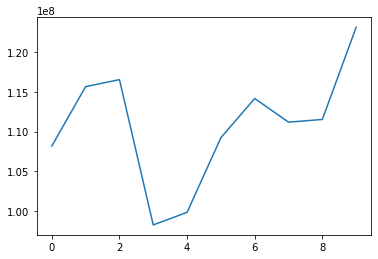

In [49]:
plt.plot(index,BEC1[3:13])

<BarContainer object of 10 artists>

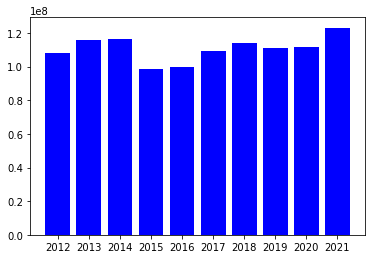

In [55]:
plt.bar(label, BEC1[3:13],color='blue')

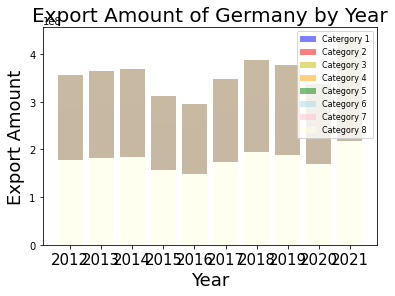

In [76]:
# Bar Chart by 2 categorical variables
# Stacked Bar Chart
label=['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
index=np.arange(len(label))
alpha = 0.5
p1 = plt.bar(index, BEC1[3:13], color='b', alpha=alpha, bottom=BEC2[3:13])
p2 = plt.bar(index, BEC2[3:13], color='r', alpha=alpha, bottom=BEC3[3:13])
p3 = plt.bar(index, BEC3[3:13], color='y', alpha=alpha, bottom=BEC4[3:13])
p4 = plt.bar(index, BEC4[3:13], color='orange', alpha=alpha, bottom=BEC5[3:13])
p5 = plt.bar(index, BEC5[3:13], color='green', alpha=alpha, bottom=BEC6[3:13])
p6 = plt.bar(index, BEC6[3:13], color='lightblue', alpha=alpha, bottom=BEC7[3:13])
p7 = plt.bar(index, BEC7[3:13], color='pink', alpha=alpha, bottom=BEC8[3:13])
p8 = plt.bar(index, BEC8[3:13], color='lightyellow', alpha=alpha)
plt.title('Export Amount of Germany by Year', fontsize=20)
plt.ylabel('Export Amount', fontsize=18)
plt.xlabel('Year', fontsize=18)
plt.xticks(index, label, fontsize=15)
plt.legend((p1[0], p2[0],p3[0], p4[0],p5[0], p6[0],p7[0], p8[0]), ('Catergory 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5', 'Category 6', 'Category 7', 'Category 8'), fontsize=8)
plt.show()